In [1]:
include("cutoff.jl")

plot_single_coordinate_over_time (generic function with 1 method)

0/100000 paths did not converge to 0 within 50 steps.


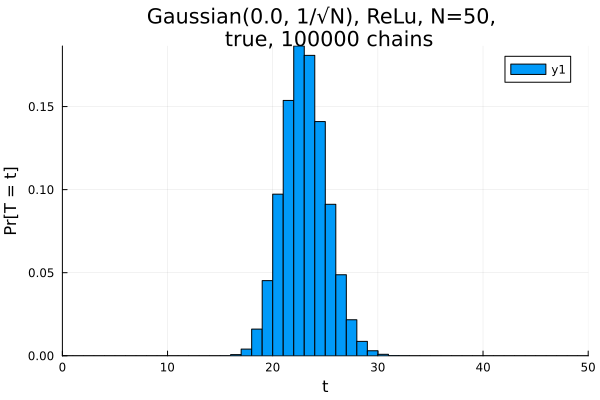

In [8]:
N = 50
X₀ = rand(Uniform(-1, 1), N)
num_chains = 1
# Dist = Uniform(-1/√N, 1/√N)
# Dist = Normal(0.0, 1)
Dist = Normal(0.0, 1/√N)
activation = σ
# activation = tanh
step_size = 0.001
num_steps = 50
forward = true
store_steps = false
num_paths = 100000

Exp = Experiment(X₀, N, num_chains, Dist, activation, step_size, num_steps, forward, store_steps)
times = time_to_convergence_to_zero(Exp, num_paths)

diststr_greek, diststr_nongreek, actstr, dynamicsstr = get_plotting_strs(Exp)

bins = 0:1:num_steps
hist = normalize(fit(Histogram, times, bins), mode=:probability)
# histogram values can be obtained from hist.weights

plot(hist,
    title="$diststr_greek, $actstr, N=$N, \n $forward, $num_paths chains",
    xlabel="t",
    ylabel="Pr[T = t]",
    xlim=(0, num_steps),
)

In [ ]:
for N=1:12
    X₀ = rand(Uniform(-1, 1), N)
    num_chains = 1
    # Dist = Uniform(-1/N, 1/N)
    Dist = Uniform(-1/√N, 1/√N)
#     Dist = Normal(0.0, 1/√N)
    # Dist = Normal(0.0, 1)
#     activation = σ
    activation = tanh
    step_size = 0.001
    num_steps = 20
    num_paths = 100000
    forward = true
    store_steps = false

    
    Exp = Experiment(X₀, N, num_chains, Dist, activation, step_size, num_steps, forward, store_steps)
    times = time_to_convergence_to_zero(Exp, num_paths)

    diststr_greek, diststr_nongreek, actstr, dynamicsstr = get_plotting_strs(Exp)
    bins = 0:1:num_steps
    hist = normalize(fit(Histogram, times, bins), mode=:probability)

    plot(hist,
        title="$diststr_greek, $actstr, N=$N, \n $dynamicsstr, $num_paths chains",
        xlabel="t",
        ylabel="Pr[T = t]",
        fontsize=30,
        tickfontsize=20,
        xlim=(0, num_steps))

    savefig("convergence_times/convergence_time_$diststr_nongreek $actstr N=$N.png")
end